데이터 분석 중...
수시: 26명, 정시: 26명 분석 완료.

[ 통계 비교 ]
구분         | 수시         | 정시        
-----------------------------------
평균(Mean)   | 122.2      | 65.8      
중앙값(Med)   | 115.0      | 65.0      
최대값(Max)   | 288        | 136       


C:\Users\Na\AppData\Local\Temp\ipykernel_22636\1104069420.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([scores_A, scores_B], labels=['수시', '정시'], patch_artist=True,


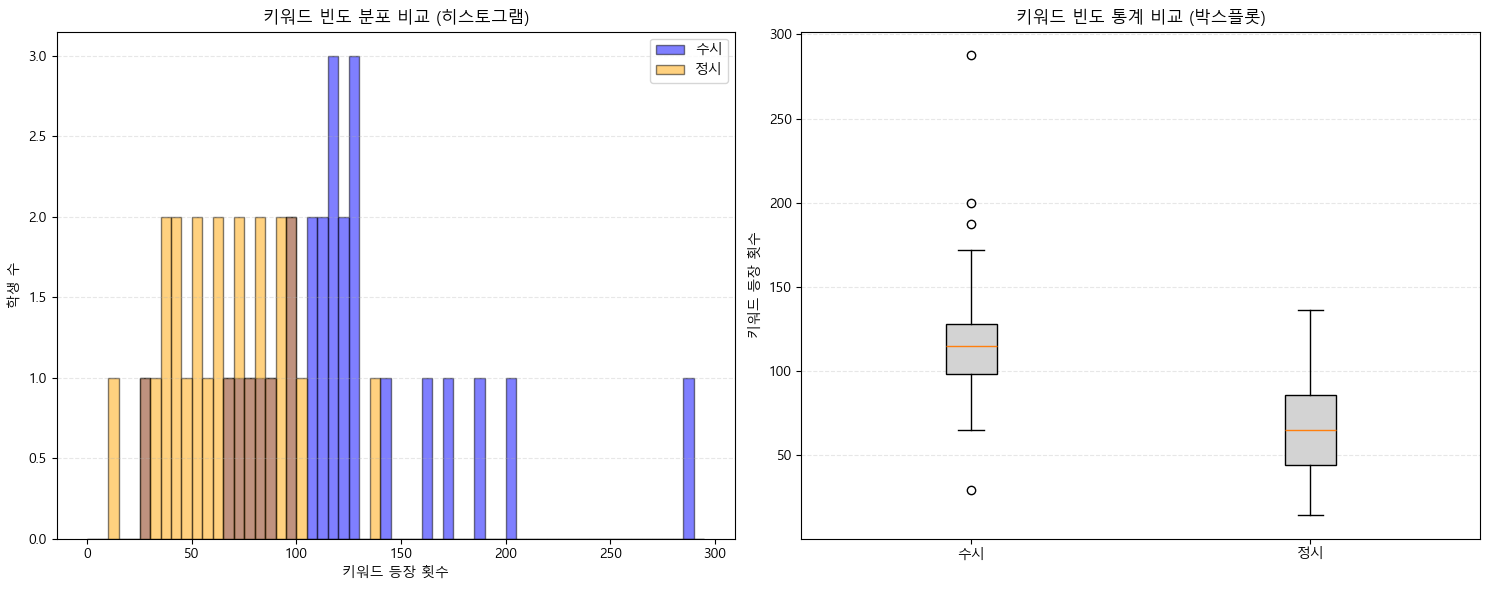

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

# --- 1. 설정 (폴더 경로 및 키워드) ---

# 두 개의 데이터 폴더 경로 (실제 폴더명으로 수정하세요)
FOLDER_A = './수시_컴과_생기부_txt' 
FOLDER_B = './정시_컴과_생기부_txt'

# 분석할 키워드 리스트
KEYWORDS = [
    "알고리즘", "프로그래밍", "파이썬", "Python", "데이터", "분석", 
    "인공지능", "AI", "머신러닝", "딥러닝", "웹", "앱", "개발", 
    "보안", "네트워크", "문제해결", "논리", "수학", "최적화", 
    "C언어", "Java", "리눅스", "서버", "클라우드", "IoT"
]

# 한글 폰트 설정
import platform
from matplotlib import font_manager, rc
try:
    if platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
except:
    pass

# --- 2. 데이터 추출 함수 (재사용) ---

def get_scores_from_folder(folder_path, keywords):
    scores = []
    if not os.path.exists(folder_path):
        print(f"경고: '{folder_path}' 폴더가 없습니다.")
        return []
    
    files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    
    for filename in files:
        file_path = os.path.join(folder_path, filename)
        total_count = 0
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read().lower()
                for keyword in keywords:
                    total_count += content.count(keyword.lower())
            scores.append(total_count)
        except UnicodeDecodeError:
            try:
                with open(file_path, 'r', encoding='cp949') as f:
                    content = f.read().lower()
                    for keyword in keywords:
                        total_count += content.count(keyword.lower())
                scores.append(total_count)
            except:
                continue
    return scores

# --- 3. 실행 및 데이터 로드 ---

print("데이터 분석 중...")
scores_A = get_scores_from_folder(FOLDER_A, KEYWORDS)
scores_B = get_scores_from_folder(FOLDER_B, KEYWORDS)

print(f"수시: {len(scores_A)}명, 정시: {len(scores_B)}명 분석 완료.")

if scores_A and scores_B:
    # --- 4. 통계 수치 비교 출력 ---
    print("\n[ 통계 비교 ]")
    print(f"{'구분':<10} | {'수시':<10} | {'정시':<10}")
    print("-" * 35)
    print(f"{'평균(Mean)':<10} | {np.mean(scores_A):<10.1f} | {np.mean(scores_B):<10.1f}")
    print(f"{'중앙값(Med)':<10} | {np.median(scores_A):<10.1f} | {np.median(scores_B):<10.1f}")
    print(f"{'최대값(Max)':<10} | {np.max(scores_A):<10} | {np.max(scores_B):<10}")

    # --- 5. 시각화 (그래프 2개 그리기) ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 그래프 1: 히스토그램 (분포 겹쳐보기)
    # alpha=0.5로 투명도를 주어 겹친 부분이 보이게 함
    # bins를 통일해야 비교가 정확함
    all_scores = scores_A + scores_B
    bins = range(0, max(all_scores) + 10, 5) 
    
    ax1.hist(scores_A, bins=bins, alpha=0.5, label='수시', color='blue', edgecolor='black')
    ax1.hist(scores_B, bins=bins, alpha=0.5, label='정시', color='orange', edgecolor='black')
    ax1.set_title('키워드 빈도 분포 비교 (히스토그램)')
    ax1.set_xlabel('키워드 등장 횟수')
    ax1.set_ylabel('학생 수')
    ax1.legend()
    ax1.grid(axis='y', linestyle='--', alpha=0.3)

    # 그래프 2: 박스플롯 (통계적 비교)
    # 중앙값, 범위, 이상치를 한눈에 비교하기 가장 좋음
    ax2.boxplot([scores_A, scores_B], labels=['수시', '정시'], patch_artist=True,
                boxprops=dict(facecolor='lightgray'))
    ax2.set_title('키워드 빈도 통계 비교 (박스플롯)')
    ax2.set_ylabel('키워드 등장 횟수')
    ax2.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("오류: 데이터가 충분하지 않습니다. 폴더 경로와 파일을 확인해주세요.")